In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.stats import norm
import pickle
import math
import random 
np.random.seed(0)

In [2]:
def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

In [3]:
class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
        """initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
            denom = r[i,0]+r[i,1]+r[i,2]
            r[i, :] = [x / denom for x in r[i,:]] 
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            ax0.scatter(self.X[i],0,c=[[r[i][0],r[i][1],r[i][2]]],s=100)
        
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
    
    def run(self):
        
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            
            
            """calculate pi_c"""
            for i in range(3):
                weights = r[:,i]
                denom = sum(weights)
                self.pi[i] = weights/len(self.X)
            
            """calculate mu_c"""
            for i in range(3):
                weights = r[:,i]
                denom = sum(weights)
                mean = sum( w*d/denom for (w,d) in zip(weights, self.X))
                self.mu[i] = mean
#             self.mu = 


            """calculate var_c"""
            var_c = []
            for i in range(3):
                weights = r[:,i]
                denom = sum(weights)
                variance = math.sqrt(sum( w*((d-self.mu[i])**2) for (w,d) in zip(weights, self.X))/denom)
                self.var[i] = variance

            plt.show()

In [4]:
data = load("dataset2.pkl")
print(np.shape(data))
data = data.flatten()
#print(data)

(60, 1)


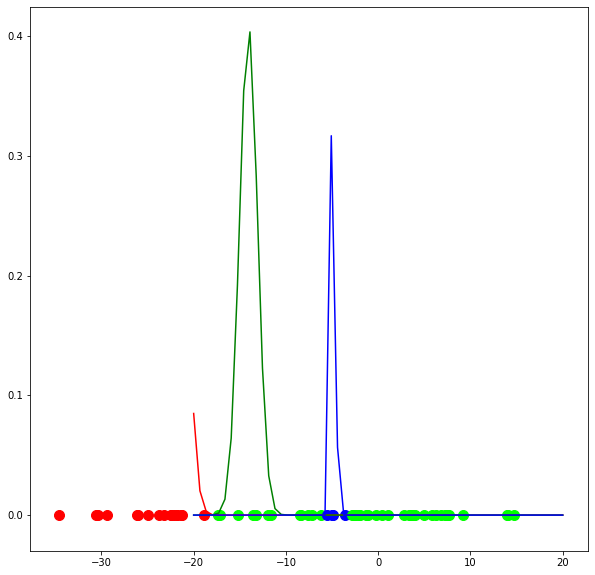

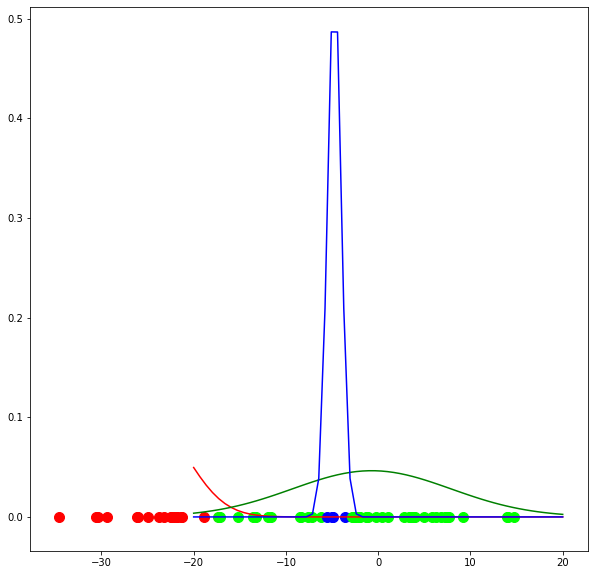

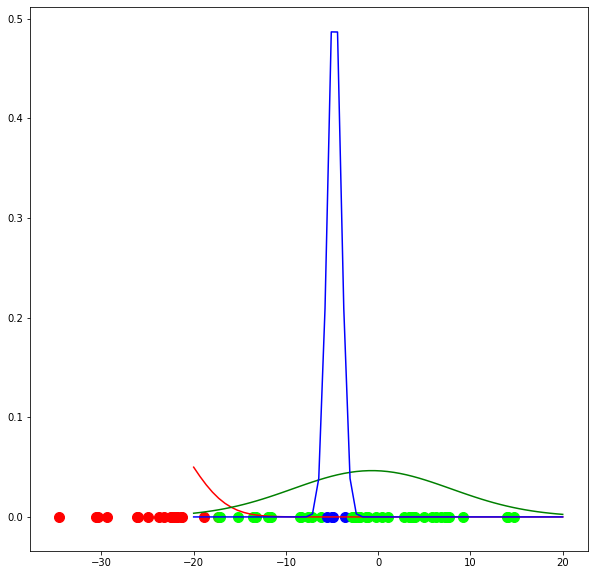

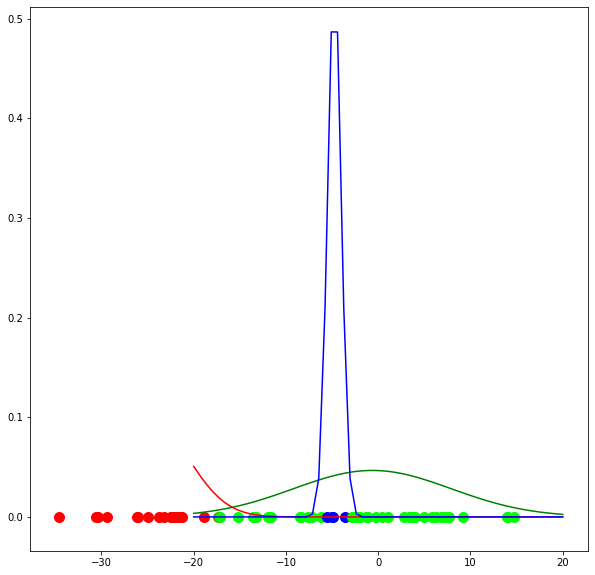

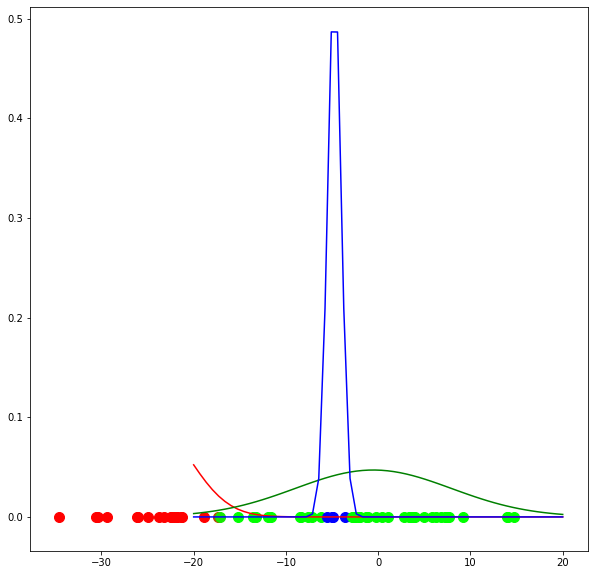

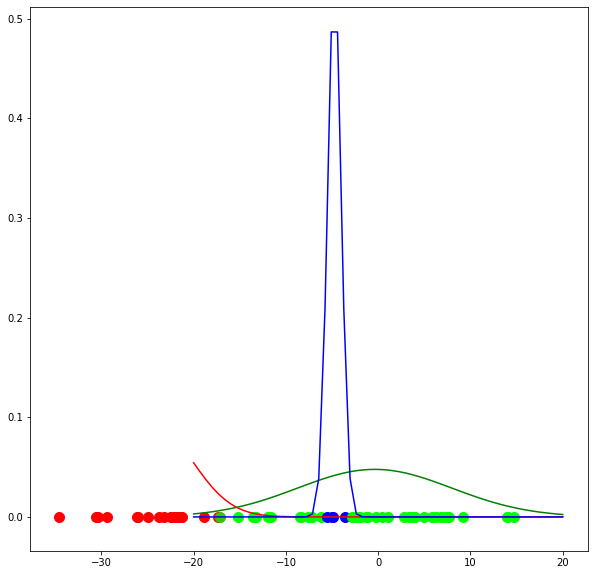

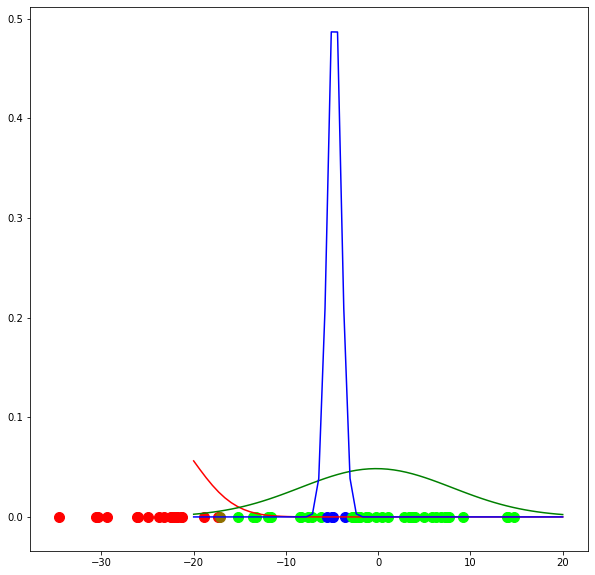

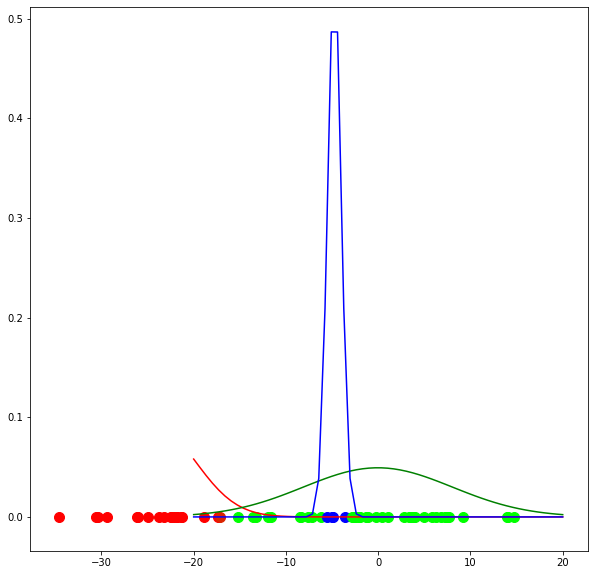

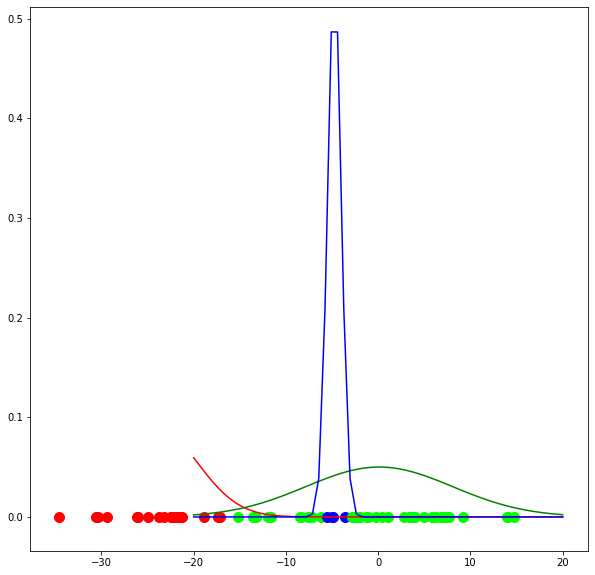

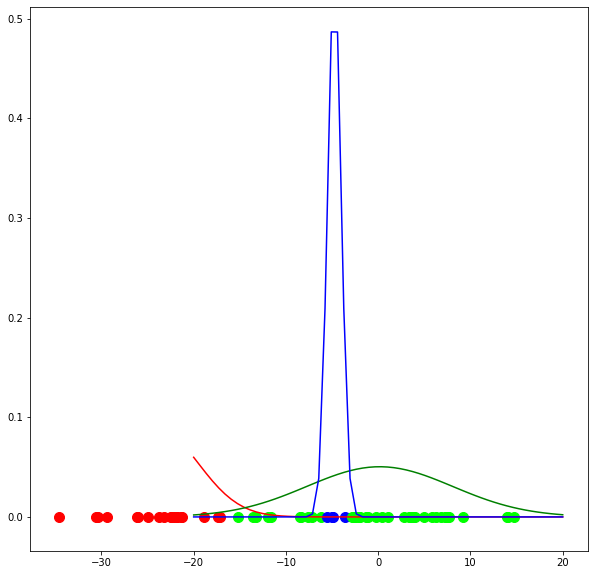

In [5]:
mu_min = min(data)
mu_max = max(data)

g = GMM1D(data,10,[random.uniform(mu_min, mu_max),random.uniform(mu_min, mu_max),random.uniform(mu_min, mu_max)],[1/3,1/3,1/3],
                   [random.uniform(0.1,1),random.uniform(0.1,1),random.uniform(0.1,1)])
g.run()